# Basics

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.cluster import KMeans

RSEED=33

c = ['#599190', '#EDAFB8', '#666A86', '#95B8D1', '#E8DDB5']
color_cfm = ['#EAF2F2', '#D9E8E8', '#CCDFDF', '#BCD6D5', "#AACBCA", '#9AC1C1', '#83B3B2', '#77ABAA', '#6BA4A3', '#5F9C9A', '#599190']

In [2]:
# load data

original_train = pd.read_csv('data/Train.csv')
original_test = pd.read_csv('data/Test.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [3]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
original_train.columns = ["country", "year", "uniqueid", "bank_account", "location", "cellphone", "household", "age", "gender", "status_household", "marital_status", "education", "job"]
original_train.head(2)

,country,year,uniqueid,bank_account,location,cellphone,household,age,gender,status_household,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [5]:
original_train.shape

(23524, 13)

In [6]:
# check for missing values 

original_train.isnull().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [7]:
original_train.isna().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [8]:
# check for unique values (to detect duplicates)

original_train.nunique()

country                4
year                   3
uniqueid            8735
bank_account           2
location               2
cellphone              2
household             20
age                   85
gender                 2
status_household       6
marital_status         5
education              6
job                   10
dtype: int64

In [9]:
original_train['uniqueid'].duplicated().sum()

14789

In [10]:
original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           23524 non-null  object
 1   year              23524 non-null  int64 
 2   uniqueid          23524 non-null  object
 3   bank_account      23524 non-null  object
 4   location          23524 non-null  object
 5   cellphone         23524 non-null  object
 6   household         23524 non-null  int64 
 7   age               23524 non-null  int64 
 8   gender            23524 non-null  object
 9   status_household  23524 non-null  object
 10  marital_status    23524 non-null  object
 11  education         23524 non-null  object
 12  job               23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# EDA

## Hypotheses 

Likeliness to have a bank account:

- country: more developed country higher than less developed country (Kenya, Tanzania, Rwanda, Uganda according to HDI)
- location_type: urban more likely than rural 
- cellphone_access: cellphone more likely than no cellphone
- household_size: the bigger the household, the less likely that this individual has a bank account (househould shares one account)
- age: younger more likely than older 
- gender: men/women balanced 
- relationship_with_head: head of household more likely than anyone else in family 
- marital_status: many different effects equal each other so the impact is low 
- education: higher education more likely than lower 
- job_level: higher job level more likely than lower 
- irrelevant: uniqueid, year

In [11]:
original_train.describe()

,year,household,age
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [12]:
original_train['bank_account'].value_counts(normalize=True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

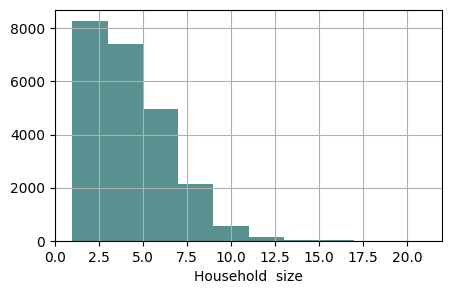

In [13]:
plt.figure(figsize=(5, 3))
original_train.household.hist(color='#599190') 
plt.xlabel('Household  size');

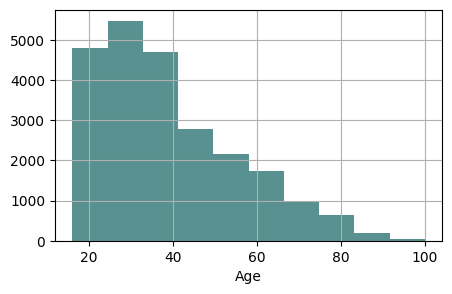

In [14]:
plt.figure(figsize=(5, 3))
original_train.age.hist(color='#599190') 
plt.xlabel('Age');

In [15]:
### add more plots about distributions here, see notebook "Johanna"

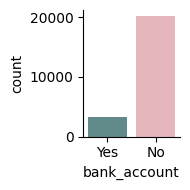

In [16]:
sns.catplot(x="bank_account", kind="count", data=original_train, height=2,palette=c)

In [17]:
features = ['country','location', 'cellphone','gender', 'status_household', 'marital_status','education', 'job']

for i in features:
    print(original_train[i].value_counts(normalize=True).round(2))

Rwanda      0.37
Tanzania    0.28
Kenya       0.26
Uganda      0.09
Name: country, dtype: float64
Rural    0.61
Urban    0.39
Name: location, dtype: float64
Yes    0.74
No     0.26
Name: cellphone, dtype: float64
Female    0.59
Male      0.41
Name: gender, dtype: float64
Head of Household      0.55
Spouse                 0.28
Child                  0.09
Parent                 0.05
Other relative         0.03
Other non-relatives    0.01
Name: status_household, dtype: float64
Married/Living together    0.46
Single/Never Married       0.34
Widowed                    0.12
Divorced/Seperated         0.09
Dont know                  0.00
Name: marital_status, dtype: float64
Primary education                  0.54
No formal education                0.19
Secondary education                0.18
Tertiary education                 0.05
Vocational/Specialised training    0.03
Other/Dont know/RTA                0.00
Name: education, dtype: float64
Self employed                   0.27
Informally empl

In [18]:
d = {}
for i in features:
    d[i] = pd.crosstab(original_train[i], original_train['bank_account'], normalize='index').mul(100).round(2)

In [19]:
d['country']

bank_account,No,Yes
country,,
Kenya,74.93,25.07
Rwanda,88.52,11.48
Tanzania,90.83,9.17
Uganda,91.39,8.61


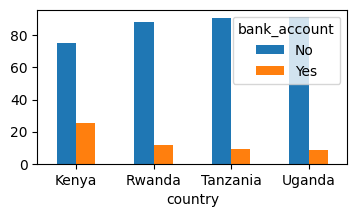

In [20]:
d['country'].plot.bar(figsize=(4,2), rot=0);

In [21]:
d['location']

bank_account,No,Yes
location,,
Rural,88.35,11.65
Urban,82.13,17.87


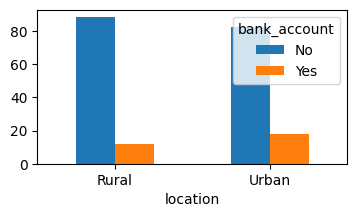

In [22]:
d['location'].plot.bar(figsize=(4,2), rot=0);

In [23]:
d['cellphone']

bank_account,No,Yes
cellphone,,
No,98.29,1.71
Yes,81.62,18.38


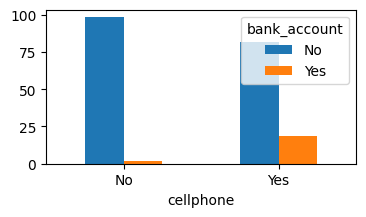

In [24]:
d['cellphone'].plot.bar(figsize=(4,2), rot=0);

In [25]:
d['gender']

bank_account,No,Yes
gender,,
Female,89.32,10.68
Male,81.03,18.97


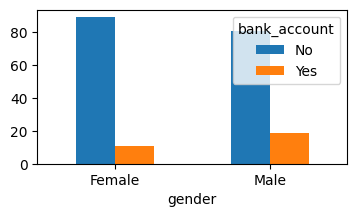

In [26]:
d['gender'].plot.bar(figsize=(4,2), rot=0);

In [27]:
d['status_household']

bank_account,No,Yes
status_household,,
Child,91.34,8.66
Head of Household,82.29,17.71
Other non-relatives,89.47,10.53
Other relative,90.12,9.88
Parent,94.01,5.99
Spouse,89.34,10.66


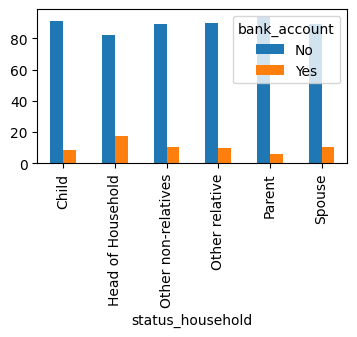

In [28]:
d['status_household'].plot.bar(figsize=(4,2), rot=90);

In [29]:
d['marital_status'].head(10)

bank_account,No,Yes
marital_status,,
Divorced/Seperated,88.73,11.27
Dont know,75.00,25.00
Married/Living together,82.64,17.36
Single/Never Married,87.90,12.10
Widowed,90.99,9.01


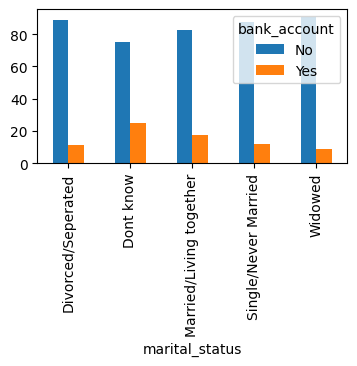

In [30]:
d['marital_status'].plot.bar(figsize=(4,2), rot=90);

In [31]:
d['education']

bank_account,No,Yes
education,,
No formal education,96.10,3.90
Other/Dont know/RTA,68.57,31.43
Primary education,91.45,8.55
Secondary education,76.72,23.28
Tertiary education,48.92,51.08
Vocational/Specialised training,42.96,57.04


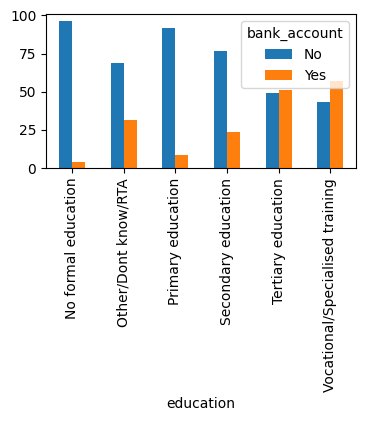

In [32]:
d['education'].plot.bar(figsize=(4,2), rot=90);

In [33]:
d['job']

bank_account,No,Yes
job,,
Dont Know/Refuse to answer,88.89,11.11
Farming and Fishing,88.33,11.67
Formally employed Government,22.48,77.52
Formally employed Private,45.88,54.12
Government Dependent,79.76,20.24
Informally employed,92.05,7.95
No Income,97.93,2.07
Other Income,81.85,18.15
Remittance Dependent,90.50,9.50


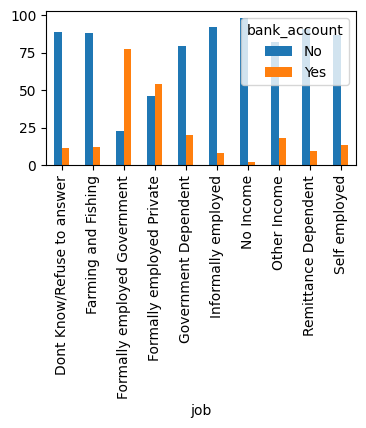

In [34]:
d['job'].plot.bar(figsize=(4,2), rot=90);

In [35]:
df_edu_job = pd.crosstab(original_train['job'], original_train['education'], normalize='index').mul(100).round(2)
df_edu_job.head(10)

education,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
job,,,,,,
Dont Know/Refuse to answer,14.29,0.00,59.52,23.81,1.59,0.79
Farming and Fishing,25.82,0.00,55.25,16.21,0.97,1.75
Formally employed Government,1.03,0.52,10.85,33.59,31.27,22.74
Formally employed Private,3.13,0.19,31.00,25.12,21.23,19.34
Government Dependent,53.04,0.40,37.25,3.64,3.24,2.43
Informally employed,20.19,0.29,60.87,14.11,3.14,1.39
No Income,18.50,0.48,49.92,22.49,7.50,1.12
Other Income,17.04,0.28,47.78,26.39,4.35,4.17
Remittance Dependent,19.55,0.08,37.87,31.78,6.89,3.84


<AxesSubplot:xlabel='job'>

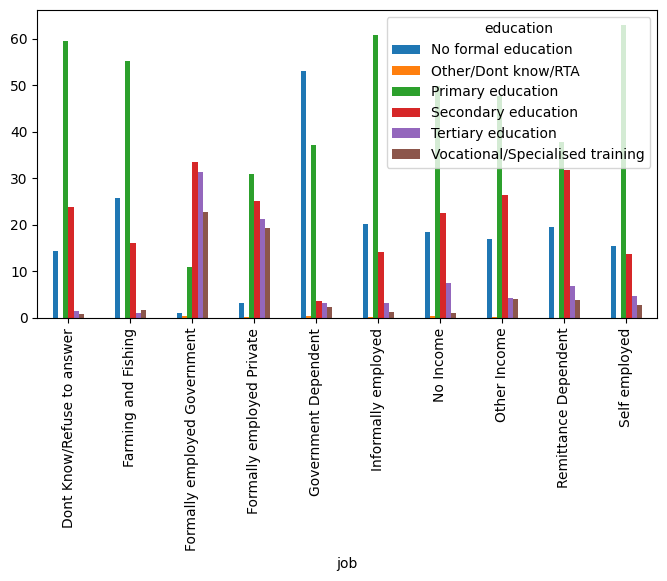

In [36]:
df_edu_job.plot.bar(figsize=(8,4), rot=90)

### Data Cleaning, Preprocessing #1

In [37]:
original_train.head(2)

,country,year,uniqueid,bank_account,location,cellphone,household,age,gender,status_household,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [39]:
#convert target variable to numeric
le = LabelEncoder()
original_train['bank_account'] = le.fit_transform(original_train['bank_account'])

In [40]:
#Separate training features from target
X_train = original_train.drop(['bank_account'], axis=1)
y_train = original_train['bank_account']

In [41]:
X_train = X_train.drop(["uniqueid", "year"], axis=1)

In [42]:
country_dummies = pd.get_dummies(X_train['country'], prefix='country', drop_first=True)
location_dummies = pd.get_dummies(X_train['location'], prefix='location', drop_first=True)
cellphone_dummies = pd.get_dummies(X_train['cellphone'], prefix='cellphone', drop_first=True)
gender_dummies = pd.get_dummies(X_train['gender'], prefix='gender', drop_first=True)

In [43]:
job_dummies = pd.get_dummies(X_train['job'], prefix='job', drop_first=True)

In [44]:
X_train = pd.concat([X_train, country_dummies, location_dummies, cellphone_dummies, gender_dummies, job_dummies], axis=1)

In [45]:
X_train = X_train.drop(['country', 'location', 'cellphone', 'gender','job'], axis=1)

In [46]:
edu_mapping = {'No formal education': 0, 
               'Primary education' : 2, 
               'Other/Dont know/RTA': 1,
               'Vocational/Specialised training': 4, 
               'Secondary education': 3, 
               'Tertiary education' : 5}

X_train = X_train.assign(edu_cat = X_train.education.map(edu_mapping))

In [47]:
marital_mapping = {'Divorced/Seperated' : 0,
                   'Dont know' : 0,
                   'Married/Living together' : 1,
                   'Single/Never Married' : 0,
                   'Widowed' : 1}

X_train = X_train.assign(marital_status = X_train.marital_status.map(marital_mapping))

In [48]:
status_household_mapping = {'Child' : 0,
                            'Head of Household' : 2,
                            'Other non-relatives': 0,
                            'Other relative' : 0,
                            'Parent': 1,
                            'Spouse': 1}

X_train = X_train.assign(status_household = X_train.status_household.map(status_household_mapping))

In [49]:
X_train.columns

Index(['household', 'age', 'status_household', 'marital_status', 'education',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'location_Urban', 'cellphone_Yes', 'gender_Male',
       'job_Farming and Fishing', 'job_Formally employed Government',
       'job_Formally employed Private', 'job_Government Dependent',
       'job_Informally employed', 'job_No Income', 'job_Other Income',
       'job_Remittance Dependent', 'job_Self employed', 'edu_cat'],
      dtype='object')

In [50]:
bins=[0,25,40,65,101]
labels = ['young adult', 'adult', 'middle age', 'elderly']
X_train['age_group'] = pd.cut(X_train['age'], bins=bins, labels=labels)

In [51]:
X_train = X_train.drop(['age'], axis=1)

In [52]:
age_mapping = {'young adult':0, 
               'adult':1, 
               'middle age':2,
               'elderly':3}

X_train = X_train.assign(age_cat = X_train.age_group.map(age_mapping))

In [53]:
X_train = X_train.drop(['age_group'], axis=1)

In [54]:
X_train = X_train.drop(['education'], axis=1)

In [55]:
X_train.head()

,household,status_household,marital_status,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,edu_cat,age_cat
0,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0
1,5,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
2,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,4,1
3,5,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,1
4,8,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,1


### Train Test Split stratified

In [56]:
X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, stratify = y_train, 
                                                  test_size = 0.3, random_state=RSEED)

In [57]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where

counter = Counter(y_Train)
print(counter)

Counter({0: 14148, 1: 2318})


In [58]:
over = SMOTE(sampling_strategy=0.3, random_state=RSEED)

In [59]:
X_Train, y_Train = over.fit_resample(X_Train, y_Train)

In [60]:
counter = Counter(y_Train)
print(counter)

Counter({0: 14148, 1: 4244})


In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
processed_X_Train = pd.DataFrame(scaler.fit_transform(X_Train),index=X_Train.index, columns=X_Train.columns)

In [62]:
processed_X_Val = pd.DataFrame(scaler.transform(X_Val),index=X_Val.index, columns=X_Val.columns)

# Model 1 Decision Tree

In [63]:
Tree = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=RSEED)
Tree.fit(processed_X_Train, y_Train) 

DecisionTreeClassifier(max_depth=15, random_state=33)

In [64]:
y_pred_Train_tree = Tree.predict(processed_X_Train)
y_pred_Val_tree = Tree.predict(processed_X_Val)
y_pred_Val_tree_proba = Tree.predict_proba(processed_X_Val)

In [65]:
y_pred_Val_tree_proba = y_pred_Val_tree_proba[:, 1]

In [66]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_tree))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_tree))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_tree, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_tree, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_tree, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_tree, pos_label=1))

Accuracy Train:  0.8937037842540235
Accuracy Test:  0.8481156134882403
F1-score Train:  0.7452768729641693
F1-score Test:  0.43638275499474233
Recall Train:  0.6738925541941565
Recall Test:  0.41750503018108653


In [67]:
cfm_tree = metrics.confusion_matrix(y_Val, y_pred_Val_tree)

In [68]:
color_cfm = ['#eaf2f2', '#d9e8e8', '#ccdfdf', '#bcd6d5', "#aacbca", '#9ac1c1', '#83b3b2', '#77abaa', '#6ba4a3', '#5f9c9a', '#599190']

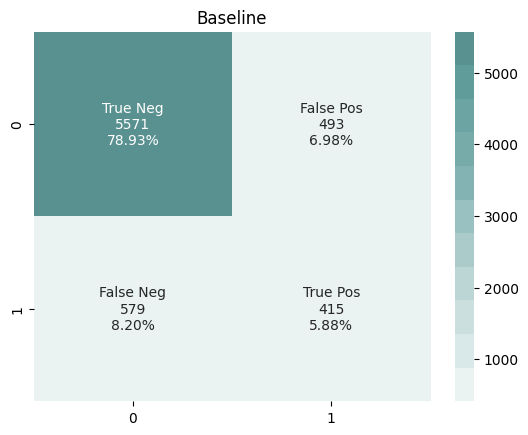

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_tree.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_tree.flatten()/np.sum(cfm_tree)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
ax.set_title('Baseline')
sns.heatmap(cfm_tree, annot=labels, fmt='', cmap=color_cfm);

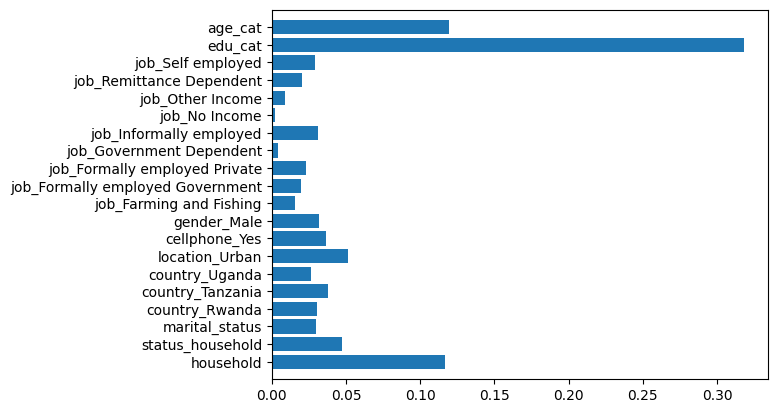

In [70]:
def plot_feature_importances(model):
    n_features = X_Train.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),X_train.columns)
    plt.ylim(-1,n_features)
    
plot_feature_importances(Tree)

# XGB

In [71]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [72]:
xgb = XGBClassifier(subsample= 1,scale_pos_weight=15,min_child_weight=7,max_depth= 5,learning_rate= 0.05, gamma= 0.3, colsample_bytree= 0.4)

In [73]:
# (subsample= 0.5,scale_pos_weight=6,min_child_weight=7,max_depth= 8,learning_rate= 0.3, gamma= 0.3, colsample_bytree= 0.7)

In [74]:
xgb.fit(processed_X_Train, y_Train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
y_pred_Train_xgb = xgb.predict(processed_X_Train)
y_pred_Val_xgb = xgb.predict(processed_X_Val)
y_pred_Val_xgb_proba = xgb.predict_proba(processed_X_Val)

In [76]:
y_pred_Val_xgb_proba = y_pred_Val_xgb_proba[:, 1]

In [77]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_xgb))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_xgb))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_xgb, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_xgb, pos_label=1))

Accuracy Train:  0.5157133536320139
Accuracy Test:  0.4559365259280249
F1-score Train:  0.48392143229619333
F1-score Test:  0.33564013840830453
Recall Train:  0.9839773798303487
Recall Test:  0.9758551307847082


In [78]:
cfm_xgb = metrics.confusion_matrix(y_Val, y_pred_Val_xgb)

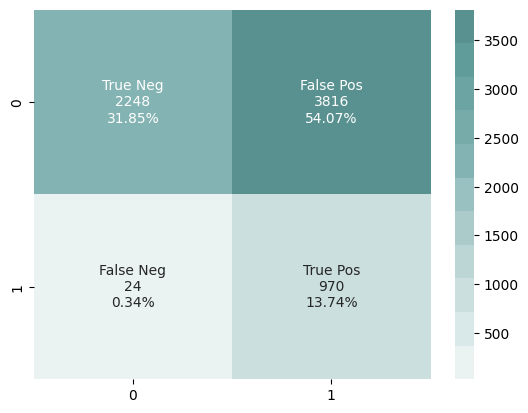

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_xgb.flatten()/np.sum(cfm_xgb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_xgb, annot=labels, fmt='', cmap = color_cfm);

### with own threshold

In [80]:
def own_prediction(probabilities, threshold):
    new_list = []
    for i in probabilities:
        if i >= threshold:
            new_list.append(1)
        else:
            new_list.append(0)
    return new_list

In [81]:
own_y_pred_Val_xgb = own_prediction(y_pred_Val_xgb_proba, 0.738)

In [82]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_xgb))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, own_y_pred_Val_xgb))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, own_y_pred_Val_xgb, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, own_y_pred_Val_xgb, pos_label=1))

Accuracy Train:  0.5157133536320139
Accuracy Test:  0.7180504392179088
F1-score Train:  0.48392143229619333
F1-score Test:  0.45299615173172064
Recall Train:  0.9839773798303487
Recall Test:  0.8289738430583501


In [83]:
cfm_xgb_own_trs = metrics.confusion_matrix(y_Val, own_y_pred_Val_xgb)

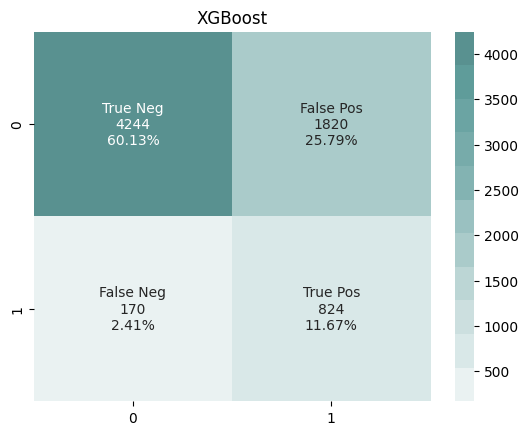

In [84]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_xgb_own_trs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_xgb_own_trs.flatten()/np.sum(cfm_xgb_own_trs)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
ax.set_title('XGBoost')
sns.heatmap(cfm_xgb_own_trs, annot=labels, fmt='', cmap= color_cfm);

### Hyper Parameter Tuning

In [85]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "subsample" : [0.5, 1],
    "scale_pos_weight" : [1, 3, 6, 10, 15]
    }

In [86]:
rs_model=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)

In [87]:
rs_model.fit(processed_X_Train,y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.3, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...
                                           num_parallel_tree=None,
                            

In [88]:
rs_model.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 15,
 'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [89]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RSEED)
scores = cross_val_score(xgb, processed_X_Train, y_Train, scoring='recall', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9752589715131336


### ROC AUC CURVE and Thresholding

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve
xgb_auc = roc_auc_score(y_Val, y_pred_Val_xgb_proba)
xgb_auc

0.8582835237015762

In [91]:
bl_auc = roc_auc_score(y_Val, y_pred_Val_tree_proba)
bl_auc

0.7500043964313585

In [93]:
fpr, tpr, thresholds = roc_curve(y_Val, y_pred_Val_xgb_proba)

In [94]:
fprbl, tprbl, thresholdsbl = roc_curve(y_Val, y_pred_Val_tree_proba)

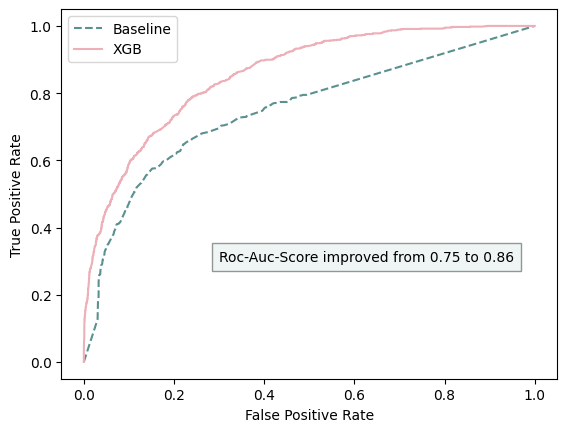

In [109]:
from matplotlib import pyplot
pyplot.plot(fprbl, tprbl, linestyle='--', label='Baseline', color='#599190')
pyplot.plot(fpr, tpr, label='XGB', color = '#edafb8')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.text(0.3,0.3,'Roc-Auc-Score improved from 0.75 to 0.86', bbox={
        'facecolor': '#D9E8E8', 'alpha': 0.4, 'pad': 5})
pyplot.legend()
pyplot.show()

In [116]:
from sklearn.metrics import precision_recall_curve
from numpy import argmax
precision, recall, thresholds = precision_recall_curve(y_Val, y_pred_Val_xgb_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix=argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.778627, F-Score=0.503


In [118]:
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

In [119]:
thresholds = np.arange(0, 1, 0.001)
scores = [metrics.f1_score(y_Val, to_labels(y_pred_Val_xgb_proba, t)) for t in thresholds]
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.778, F-Score=0.50324


### Feature importance and feature selection

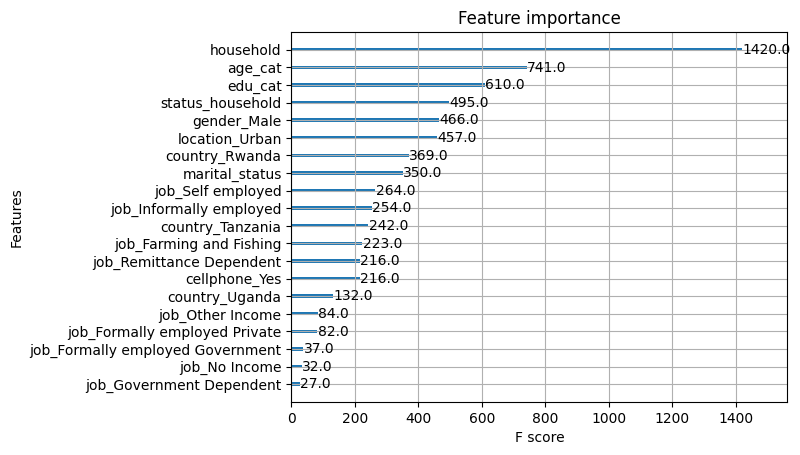

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, scale_pos_weight=10, subsample=1;, score=0.528 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, scale_pos_weight=10, subsample=1;, score=0.520 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=5, scale_pos_weight=10, subsample=0.5;, score=0.545 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5, scale_pos_weight=15, subsample=0.5;, score=0.569 total time=   2.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5, scale_pos_weight=15, subsample=0.5;, score=0.529 total time=   0.9s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7, scale_pos_weight=6, subsample=0.5;, score=0.660 total time=   2.1s
[CV 3/

In [120]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb)
pyplot.show()

In [122]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_Train = selection.transform(processed_X_Train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_Train, y_Train)
    # eval model
    select_X_Val = selection.transform(X_Val)
    y_pred_eval = selection_model.predict(select_X_Val)
    predictions = [round(value) for value in y_pred_eval]
    Recall = metrics.recall_score(y_Val, predictions)
    print("Thresh=%.3f, n=%d, Recall: %.2f%%" % (thresh, select_X_Train.shape[1], Recall*100.0))

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.025, n=20, Recall: 31.79%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=19, Recall: 41.65%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.029, n=18, Recall: 77.46%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=17, Recall: 76.26%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=16, Recall: 76.76%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=15, Recall: 76.66%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.031, n=14, Recall: 74.04%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.032, n=13, Recall: 74.04%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.032, n=12, Recall: 86.42%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.035, n=11, Recall: 82.49%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.037, n=10, Recall: 82.29%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.038, n=9, Recall: 82.70%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.038, n=8, Recall: 82.39%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=7, Recall: 81.39%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.049, n=6, Recall: 92.56%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.065, n=5, Recall: 92.56%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.069, n=4, Recall: 92.76%
Thresh=0.071, n=3, Recall: 24.45%
Thresh=0.138, n=2, Recall: 6.94%
Thresh=0.152, n=1, Recall: 7.24%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [123]:
selection = SelectFromModel(xgb, threshold=0.021, prefit=True)
select_X_Train = selection.transform(processed_X_Train)

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [124]:
selection_xgb = XGBClassifier()
selection_xgb.fit(select_X_Train, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
select_X_Val = selection.transform(X_Val)

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Error Analysis

In [126]:
index = X_Val.index

In [127]:
yhats = pd.Series(y_pred_Val_xgb, name ="Y_hats", index=index)

In [128]:
X_Val_err_an = pd.concat([X_Val, yhats, y_Val], axis=1)

In [129]:
def error_analysis(row):
    if row['bank_account'] == 0 and row['Y_hats'] == 0:
        return "TN"
    if row['bank_account'] == 1 and row['Y_hats'] == 1:
        return "TP"
    if row['bank_account'] == 0 and row['Y_hats'] == 1:
        return "FP"
    if row['bank_account'] == 1 and row['Y_hats'] == 0:
        return "FN"

In [130]:
X_Val_err_an['error_analysis'] = X_Val_err_an.apply(lambda row: error_analysis(row), axis=1)

In [131]:
TP = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "TP")]
TP.describe()

,household,status_household,marital_status,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,job_Farming and Fishing,...,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,edu_cat,Y_hats,bank_account
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.00000,738.000000,738.000000,...,738.000000,738.000000,738.000000,738.0,738.000000,738.000000,738.000000,738.000000,738.0,738.0
mean,3.434959,1.651762,0.623306,0.280488,0.189702,0.043360,0.524390,0.98916,0.565041,0.182927,...,0.226287,0.017615,0.098916,0.0,0.058266,0.062331,0.257453,3.245257,1.0,1.0
std,2.152080,0.604711,0.484886,0.449542,0.392331,0.203805,0.499743,0.10362,0.496088,0.386869,...,0.418711,0.131637,0.298752,0.0,0.234404,0.241919,0.437527,1.208635,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.0,1.0
50%,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,1.0,1.0
75%,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,4.000000,1.0,1.0
max,17.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,5.000000,1.0,1.0


In [132]:
FN = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "FN")]
FN.describe()

,household,status_household,marital_status,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,job_Farming and Fishing,...,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,edu_cat,Y_hats,bank_account
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.0,256.0
mean,3.843750,1.476562,0.605469,0.425781,0.210938,0.066406,0.328125,0.914062,0.414062,0.285156,...,0.027344,0.023438,0.257812,0.011719,0.054688,0.105469,0.226562,2.023438,0.0,1.0
std,2.269793,0.702543,0.489707,0.495429,0.408773,0.249479,0.470450,0.280821,0.493524,0.452373,...,0.163402,0.151585,0.438287,0.107828,0.227815,0.307758,0.419427,1.119978,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.0
50%,3.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.0
75%,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.250000,0.0,1.0
max,13.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.0,1.0


In [135]:
FP = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "FP")]
FP.describe()

,household,status_household,marital_status,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,job_Farming and Fishing,...,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,edu_cat,Y_hats,bank_account
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.0,1538.0
mean,4.014304,1.545514,0.700910,0.403121,0.133290,0.045514,0.328349,0.961638,0.517555,0.335501,...,0.069571,0.009753,0.198960,0.001951,0.039012,0.100130,0.223017,2.418726,1.0,0.0
std,2.212475,0.663832,0.458008,0.490684,0.339998,0.208496,0.469765,0.192130,0.499854,0.472319,...,0.254505,0.098306,0.399347,0.044137,0.193686,0.300271,0.416405,1.094833,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,0.0
50%,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,0.0
75%,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,0.0
max,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.0,0.0


In [133]:
TN = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "TN")]
TN.head(2)

,household,status_household,marital_status,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,job_Farming and Fishing,...,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,edu_cat,age_cat,Y_hats,bank_account,error_analysis
22542,6,2,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,3,0,0,TN
14130,4,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,TN
